### Método DeepCrossEntropy 

Como modelo base usaremos el método de entropia cruzada profunda, que utiliza como agente un clasificador encargado de imitar una politica $\pi: S \rightarrow A$ (función de los  estados a las acciones) de elites, es decir pares $\langle s,a \rangle $ cuya recompesa está por encima de cierto umbral.


In [1]:
#!pip install neat-python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import gym 


In [4]:
env = gym.make("CartPole-v1")

observation = env.reset()
for i in range(1000):
  env.render()
  action = env.action_space.sample()

  print("action: ", action)

  obs, reward, done, info = env.step(action)
  
  if done:
    observation = env.reset()

env.close()



action:  0
action:  1
action:  1
action:  1
action:  0
action:  0
action:  1
action:  0
action:  0
action:  1
action:  0
action:  0
action:  0
action:  0
action:  0
action:  1
action:  1
action:  0
action:  0
action:  0
action:  1
action:  0
action:  1
action:  0
action:  0
action:  0
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1
action:  0
action:  1
action:  1
action:  0
action:  0
action:  1
action:  1
action:  1
action:  1
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  0
action:  1
action:  1
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1
action:  0
action:  1
action:  1
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  0

action:  0
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  0
action:  1
action:  0
action:  0
action:  0
action:  0
action:  0
action:  0
action:  0
action:  0
action:  1
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1
action:  0
action:  0
action:  1
action:  0
action:  1
action:  1
action:  0
action:  0
action:  0
action:  0
action:  1
action:  0
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1
action:  1
action:  0
action:  1
action:  0
action:  0
action:  1
action:  1
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  0
action:  0
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1
action:  0
action:  0
action:  1
action:  1
action:  1
action:  0
action:  0
action:  0
action:  1
action:  1
action:  0
action:  1
action:  1
action:  1
action:  1
action:  1
action:  0
action:  1

### LunarLander-v2 

In [8]:
import gym.spaces 
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline

env = gym.make('LunarLander-v2')

env.reset()

for _ in range(200):
    env.render()
    env.step(env.action_space.sample())


env.close()
    

In [6]:
#!pip install Box2D

In [35]:
n_actions= env.action_space.n
print("Número de acciones:",n_actions) # [0,1,2,3]
print("Espacio de acciones:", env.action_space)


Número de acciones: 4
Espacio de acciones: Discrete(4)


In [36]:
print("Ambiente: ", env.world)

Ambiente:  b2World(autoClearForces=True,
        bodies=[b2Body(active=True,
                      angle=0.0,
                      angularDamping=0.0,
                      angularVelocity=0.0,
                      awake=True,
                      bullet=False,
                      contacts=[],
                      fixedRotation=False,...  )],
        bodyCount=4,
        contactCount=0,
        contactFilter=None,
        contactListener=ContactDetector(),
        contactManager=b2ContactManager(allocator=<Swig Object of type 'b2BlockAllocator *' at 0x00000166888A0DB0>,
                                        broadPhase=proxyCount=14,),
                                        contactCount=0,
                                        contactFilter=b2ContactFilter(),
                                        contactList=None,
                                        contactListener=b2ContactListener(),
                                        ),
        contacts=[],
        continuousPhy

### Modelo Base Perceptron Multicapa


In [37]:
from sklearn.neural_network import MLPClassifier

agente = MLPClassifier(
    hidden_layer_sizes = (200,25),
    learning_rate_init = 0.01,
    activation = 'tanh',
    warm_start = True, #
    max_iter = 1)

#inicializa agente 
agente.fit([env.reset()]*n_acciones, list(range(n_acciones))   )

F:\Instalaciones\anaconda\envs\rl\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 25),
              learning_rate_init=0.01, max_iter=1, warm_start=True)

In [38]:
!pip install sklearn

In [43]:
def select_elites(states_batch,actions_batch,rewards_batch,percentile=50):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i][t]
    
    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions
    
    Please return elite states and actions in their original order 
    [i.e. sorted by session number and timestep within session]
    
    If you're confused, see examples below. Please don't assume that states are integers (they'll get different later).
    """
    
    #print("Rewards batch shape",len(rewards_batch), len(rewards_batch[0]))
    reward_threshold =np.percentile(rewards_batch, q =percentile) #<Compute minimum reward for elite sessions. Hint: use np.percentile>
    
    index_elite= rewards_batch  >= reward_threshold
    #print("Index_elite", index_elite.shape)
    
    elite_states,elite_actions = [],[]
    for i in range(index_elite.shape[0]):
        if index_elite[i] == True:
            elite_states += states_batch[i]
            elite_actions+= actions_batch[i]
    
    return elite_states,elite_actions

In [44]:
from IPython.display import clear_output

def show_progress(batch_rewards, log, percentile, reward_range=[-990,+10]):
    """
    Muestra el proceso del entrenamiento 
    """
    
    mean_reward, threshold = np.mean(batch_rewards), np.percentile(batch_rewards, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f"%(mean_reward, threshold))
    plt.figure(figsize=[8,4])
    plt.subplot(1,2,1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.hist(batch_rewards, range=reward_range);
    plt.vlines([np.percentile(batch_rewards, percentile)], [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    plt.show()


In [49]:
def generate_session(agent, t_max=1000):
    """
    t_max: máximo número de pasos en la simulación del 
    juego
    
    Ejecuta una sesón del juego dado en env
    por un máximo de t_max pasos 
    
    """
    
    states,actions = [],[]
    total_reward = 0
    
    s = env.reset()
    #print("Type of state", s.shape)
    
    for t in range(t_max):
        
        
        #predice una distribución sobre las acciones 
        #dado el estado actual s
        probs = agent.predict_proba([s])[0] 
        
        a = np.random.choice(n_actions, p = probs)
        
        new_s, r, done, info = env.step(a)
        
        #guarda la sesión.
        states.append(s)
        actions.append(a)
        total_reward += r
        
        s = new_s
        
        #Juego finalizado
        if done: break
            
    return states, actions, total_reward
        

In [55]:
def train(agent, n_sessions = 100,save_iterations = 5,  percentile = 70): 
    """
    agent: skelearn.MLPClassifier
    
    n_sessions: int 
        número de sesiones a correr
        
    save_iterations: int 
        guarda después de ese número de iteraciones.
        
    
    percentil: int entre 0 y 100 
        percentil para seleccionar a  los elites 
        percentil 60 elige solo pares <estado,acción> por arriba del 60% percentil 
        
    """
    log = []

    save_iterations = 5
    last = [[]]*save_iterations
    sessions = []
    for i in range(10):
        print("Iteration:",i)
        
        # Ejecuta el juego 
        new_sessions =  [ generate_session(agent) for _ in range(n_sessions)]#[<generate a list of n_sessions new sessions>] 

        last[i%save_iterations] = new_sessions

        if i >= save_iterations:
            sessions = []
            for j in range(save_iterations):
                sessions+= last[j]
        else:
            sessions= new_sessions

        batch_states,batch_actions,batch_rewards = map(np.array, zip(*sessions))

        elite_states, elite_actions = select_elites(batch_states,batch_actions,batch_rewards,percentile) # selecciona pares <estado,acción> elites

        #Entrena el agente para que  prediga dado el estado predict elite_actions(y) from elite_states(X)>
        agent.fit(elite_states,elite_actions)

        print("Max batch rewards", np.max(batch_rewards))

        show_progress(batch_rewards, log, percentile, reward_range=[np.min(batch_rewards),np.max(batch_rewards)])

        if np.mean(batch_rewards)>= 200:
            print("You Win! You may stop training now via KeyboardInterrupt.")

mean reward = -100.014, threshold=-82.613


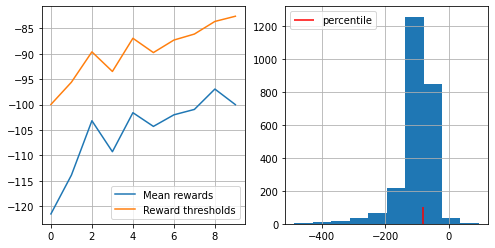

In [56]:
n_sessions = 500
percentile = 60

train(agent = agente, n_sessions = n_sessions,save_iterations = 5,  percentile = percentile)

### Visualización del agente

In [57]:
import gym.wrappers
env = gym.wrappers.Monitor(gym.make("LunarLander-v2"), directory="videos", force=True)
sessions = [generate_session(agente) for _ in range(500)]
env.close()

!pip install pickle


#### Guarda el agente

In [59]:
import pickle
# save the classifier
with open('nn.pkl', 'wb') as fid:
    pickle.dump(agente, fid)    

# load it again
#with open('nn.pkl', 'rb') as fid:
#    gnb_loaded = cPickle.load(fid)